<a href="https://colab.research.google.com/github/ArunDharavath/ML-projects/blob/main/Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [3]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [7]:
def plot_sample(X, y, index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

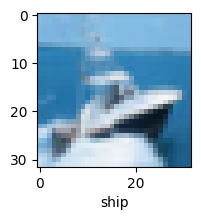

In [8]:
plot_sample(X_train, y_train, 8)

In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 185s 118ms/step - loss: 1.8127 - accuracy: 0.3532
Epoch 2/5
1563/1563 [==============================] - 159s 102ms/step - loss: 1.6222 - accuracy: 0.4291
Epoch 3/5
1563/1563 [==============================] - 157s 101ms/step - loss: 1.5399 - accuracy: 0.4584
Epoch 4/5
1563/1563 [==============================] - 154s 98ms/step - loss: 1.4812 - accuracy: 0.4783
Epoch 5/5
1563/1563 [==============================] - 164s 105ms/step - loss: 1.4297 - accuracy: 0.4958


In [11]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 11s 34ms/step - loss: 1.5288 - accuracy: 0.4518


[1.5288139581680298, 0.45179998874664307]

In [12]:
from sklearn.metrics import confusion_matrix , classification_report
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 10s 31ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.35      0.47      1000
           1       0.50      0.68      0.58      1000
           2       0.40      0.27      0.32      1000
           3       0.36      0.29      0.32      1000
           4       0.51      0.25      0.34      1000
           5       0.58      0.22      0.31      1000
           6       0.35      0.77      0.48      1000
           7       0.76      0.34      0.47      1000
           8       0.40      0.83      0.54      1000
           9       0.49      0.50      0.49      1000

    accuracy                           0.45     10000
   macro avg       0.50      0.45      0.43     10000
weighted avg       0.50      0.45      0.43     10000



In [13]:
cnn = models.Sequential([
        #cnn
        layers.Conv2D(filters=32, activation='relu', kernel_size=(3,3), input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(filters=64, activation='relu', kernel_size=(3,3)),
        layers.MaxPooling2D((2,2)),

        #dense
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])



In [14]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [15]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 70s 44ms/step - loss: 1.4561 - accuracy: 0.4787
Epoch 2/5
1563/1563 [==============================] - 70s 44ms/step - loss: 1.1084 - accuracy: 0.6144
Epoch 3/5
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9736 - accuracy: 0.6601
Epoch 4/5
1563/1563 [==============================] - 69s 44ms/step - loss: 0.8854 - accuracy: 0.6928
Epoch 5/5
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8140 - accuracy: 0.7182


In [16]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 5s 16ms/step - loss: 0.9112 - accuracy: 0.6862


[0.9111519455909729, 0.6862000226974487]

In [17]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 4s 12ms/step


array([[1.3645749e-03, 6.3623484e-05, 2.2493694e-02, 5.3835255e-01,
        3.6873491e-03, 2.8286308e-01, 1.0731269e-01, 4.5358369e-04,
        4.3351986e-02, 5.6739638e-05],
       [2.3221860e-02, 4.0909225e-01, 2.2488392e-04, 1.0142975e-04,
        5.0360319e-05, 2.7794069e-06, 3.0733881e-06, 3.0155552e-05,
        5.5976278e-01, 7.5103133e-03],
       [8.8660128e-02, 3.4962493e-01, 4.9933838e-03, 3.5602262e-03,
        2.8074300e-03, 4.5815049e-04, 3.0457252e-04, 1.5170318e-03,
        5.0997061e-01, 3.8103465e-02],
       [9.4380093e-01, 4.0791840e-03, 2.4164671e-02, 4.0866967e-04,
        1.0112385e-03, 5.5828591e-06, 1.2560751e-03, 2.9818751e-04,
        2.4144694e-02, 8.3076343e-04],
       [1.0999699e-05, 6.0332328e-04, 1.1282501e-02, 5.6248330e-02,
        3.9174455e-01, 2.4451809e-02, 5.1490116e-01, 6.9042675e-05,
        6.7500182e-04, 1.3365029e-05]], dtype=float32)

In [18]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [19]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [20]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.79      0.73      1000
           1       0.76      0.86      0.81      1000
           2       0.58      0.57      0.57      1000
           3       0.52      0.51      0.52      1000
           4       0.59      0.63      0.61      1000
           5       0.65      0.53      0.58      1000
           6       0.78      0.77      0.77      1000
           7       0.66      0.81      0.73      1000
           8       0.81      0.77      0.79      1000
           9       0.87      0.63      0.73      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.68     10000
weighted avg       0.69      0.69      0.68     10000

